In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import numpy as np
from numpy import array as array
import h5py
import matplotlib.gridspec as gridspec
import math  
import csv

# used to get files in google drive
# from google.colab import drive
# from google.colab import files

# Plot the sample sizes histogram

In [ ]:
# all the sound files
labelDir = "labelfileDir"
labelFiles = ["SA_10Sep2020.txt", "Table_13AB_10Sep2020.txt", "Table_control_10Sep2020.txt"]

times = [] 
freqs = []
files = []
sonotypes = []
actTimes = []
groups = []
selection = []

for labelFile in labelFiles:
  print()
  labelFilePath = labelDir + labelFile
  with open(labelFilePath) as file:
    label_reader = csv.reader(file, delimiter='\t')
    for row in label_reader:
      # not use the first row
      if (not row[0].isnumeric()):
        continue

      # all the recording are either start at 0min or 30mins
      duration = float(row[4]) - float(row[3])
      timeWeight = [3600,60,1,0.0001]
      actSta = sum([a*b for a,b in zip(timeWeight, map(int,row[10].replace('.',":").split(':')))])
      actEnd = actSta + duration
      
      # get file name
      if labelFile == "SA_10Sep2020.txt":
        fileName = "Spatial analysis/" + row[7].split("Audios_SA\\")[-1].replace("\\","/")
      elif labelFile == "Table_13AB_10Sep2020.txt":
        fileName = "13AB/" + row[7].split("\\")[-1]
        # 3B_20180607_070500_Dawn_Sunrise_Based.wav
        # or 20180908_060000_13A_24H [1.4452 116.9811].wav
      elif labelFile == "Table_control_10Sep2020.txt":
        fileName = "Control sites/" + row[7].split("\\")[-1]
        
      splName = row[7].split("\\")[-1].split("_")

      # get the start time of cur recording
      # actual time is either in index 1 or 2 in splName
      if (len(splName[1]) == 6):
        strTime = splName[1]         
      elif (len(splName[2]) == 6):   
        strTime = splName[2]
      else: 
        print(row[0])
        continue  

      recLis = [int(strTime[0]) * 10 + int(strTime[1]),
                int(strTime[2]) * 10 + int(strTime[3]), 
                int(strTime[4]) * 10 + int(strTime[5])]    

      recSta = sum([a*b for a,b in zip(timeWeight, recLis)])

      # start, end time used to corp the specs
      start = actSta - recSta
      end = start + duration

      try:
        sonotypes.append(int(row[11]))
        times.append([start,end])
        actTimes.append([actSta, actEnd])
        freqs.append([float(row[5]), float(row[6])])
        files.append(fileName) 
        groups.append(row[12])
        selection.append(int(row[0]))
      except:
        # selection number
        print(filename)
        print(row[0])
        pass

print("dataset size:  %i" % len(times))    
print("filename sample: " + files[0])

# print(len(files))
print(actTimes[len(files)-1])
print(times[len(files)-1])




dataset size:  3783
filename sample: Spatial analysis/4B/20180607_6h_day_weekly/20180607_060500_Dawn_Sunrise__4B___.wav
[26616.9212, 26621.323112212023]
[1176.9212000000007, 1181.3231122120233]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

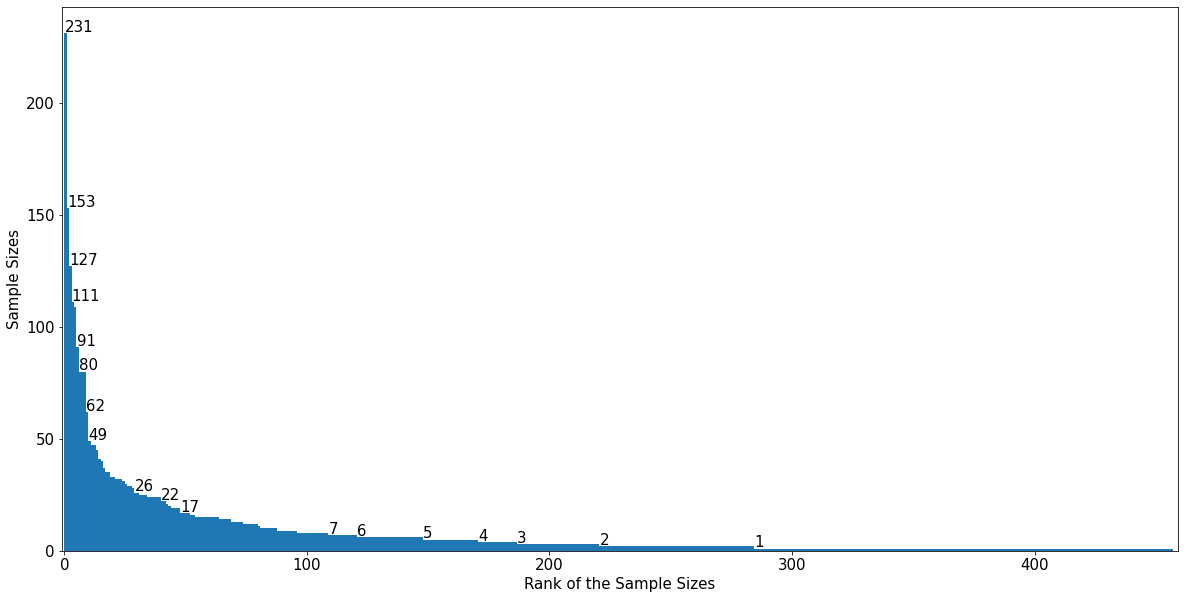

In [ ]:
# histogram
# get the data for top k sonotypes

from google.colab import files
s_unique, s_freq = np.unique(sonotypes,return_counts=True)
s_freq_order = np.argsort(s_freq)[::-1]
s_freq_desc = s_freq[s_freq_order]
s_unique_desc = s_unique[s_freq_order]

# print(s_unique_desc[:20])
# print(s_freq_desc[:50])
# plt.plot(np.arange(50), s_freq_desc[:50])
# len(s_freq_desc)

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 15})
# top 50 
# plt.xlim((-0.5, 50.5))

# plot all
plt.xlim((-1, len(s_freq_desc)+ 1))   

# plot 50
# arr=plt.hist(np.repeat(np.arange(51), s_freq_desc[:51]), bins = 51, edgecolor="black")
# plot all 
arr=plt.hist(np.repeat(np.arange(len(s_freq_desc)), s_freq_desc), bins = len(s_freq_desc))

# plt.title("Histogram of Sample Sizes of Animals with Top 50 Sample Sizes")
plt.ylabel("Sample Sizes")
plt.xlabel("Rank of the Sample Sizes")

# sample size on the histogram for top 50
# for i in range(50):
#   if i==0 or arr[0][i] != arr[0][i-1] and i != 4:
#     plt.text(arr[1][i] + 0.1,arr[0][i] + 2,int(arr[0][i]))

# for all
for i in range(len(s_freq_desc)):
  if i==0 or arr[0][i] < arr[0][i-1] -10 or (i > 100 and arr[0][i] < arr[0][i-1]) or (i > 20 and arr[0][i] < arr[0][i-1] - 1):
    plt.text(arr[1][i] + 0.1,arr[0][i] + 0.5,int(arr[0][i]))

plt.savefig("/histogram_all.png",bbox_inches='tight')
files.download("/histogram_all.png")  

# Box plots 
aug - no aug

In [ ]:
# augmented
filePath = "filepath"

with open(filePath) as f:
    contents = f.read()

no_aug = False
cur_classes_num = 0

aug_accuracy = {}
no_aug_accuracy = {}

splited_lists = contents.split("\n\n")
for splited_list in splited_lists:
  if not splited_list.strip():
    continue
  # comment line start with //
  if "//" in splited_list:
    cur_class_num, numbers = int(splited_list.split("\n")[0][-1]), splited_list.split("\n")[1].split(",")
    numbers = [float(x) for x in numbers if x]

    if cur_class_num in aug_accuracy:
        aug_accuracy[cur_class_num] = list(np.append( aug_accuracy[cur_class_num], numbers))
    else:
      aug_accuracy[cur_class_num] = numbers

  else:
    splited_list = splited_list.split("\n")
    for cur_list in splited_list:
      cur_list = cur_list.split(",")
      cur_class_num = len(cur_list[0].split(";"))
      numbers = [float(cur_list[-1].replace(";",""))]

      if cur_class_num in aug_accuracy:
        aug_accuracy[cur_class_num] = list(np.append( aug_accuracy[cur_class_num], numbers))
      else:
        aug_accuracy[cur_class_num] = numbers

# print(aug_accuracy)
# print(aug_accuracy[2])

[2, 3, 4, 5, 6] [[1.0, 1.0, 1.0, 0.8999999761581421, 1.0, 0.8999999761581421, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8999999761581421, 0.5, 0.8999999761581421, 1.0, 1.0, 1.0, 1.0, 1.0], [0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.9333333373069763, 1.0, 1.0, 1.0, 1.0, 0.3333333432674408, 0.8666666746139526, 0.9333333373069763, 1.0, 0.800000011920929, 0.9333333373069763, 0.8666666746139526, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.800000011920929], [0.949999988079071, 0.75, 0.699999988079071, 0.8500000238418579, 0.75, 0.949999988079071, 0.8500000238418579, 1.0, 0.8500000238418579, 1.0, 0.8500000238418579, 0.8500000238418579, 0.8999999761581421, 0.9722222089767456, 0.8500000238418579, 0.8500000238418579, 0.949999988079071, 0.949999988079071, 0.800000011920929, 0.8500000238418579, 0.8999999761581421, 0.8999999761581421], [1.0, 0.7200000286102295, 0.47999998927116394, 0.800000011920929, 0.8799999952316284, 1.0, 0.7200000286102295, 0.9200000166893005, 0.9200000166893005, 0.7599999904

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0.0, 1.1)

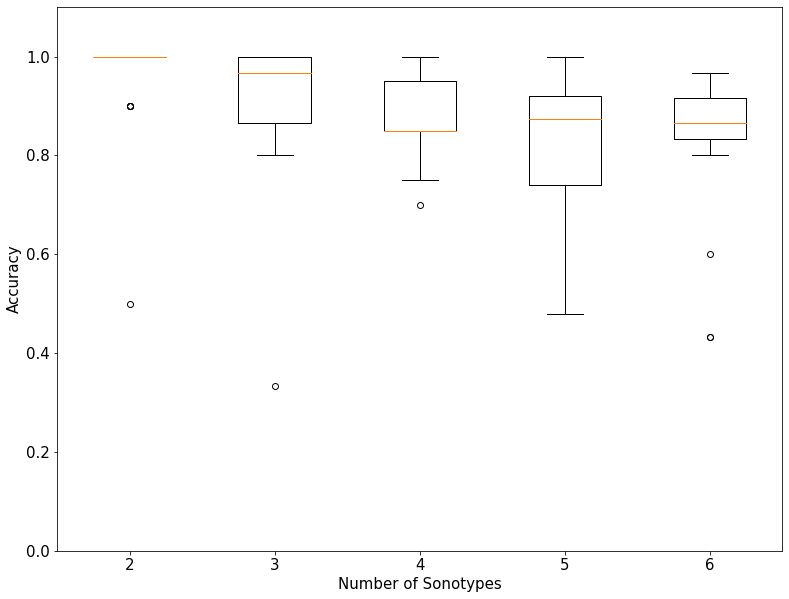

In [ ]:
plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 15})
# plt.title('Classification Accuracy On Birds with 49 Samples Per Classes With Augmentation')
plt.xlabel('Number of Sonotypes')
plt.ylabel('Accuracy')

labels,data = [],[]
for i in range(2,7):
  labels.append(i)
  data.append(aug_accuracy[i])
# labels, data = [*zip(*aug_accuracy.items())] 
print(labels,data) 
# plt.boxplot(data,meanline = True, showmeans=True, medianprops=dict(linewidth=0),
#             meanprops= dict(linestyle='-.', linewidth=2.5, color='firebrick'))
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim([0,1.1])

# plt.show()

# plt.savefig("/augmentation_acc.png",bbox_inches='tight')
# files.download("/augmentation_acc.png")  

In [ ]:
# not augmented, the same as above, parameter names not changes, just the different file path
filePath = "filepath"

with open(filePath) as f:
    contents = f.read()

no_aug = False
cur_classes_num = 0

aug_accuracy = {}
no_aug_accuracy = {}

splited_lists = contents.split("\n\n")
for splited_list in splited_lists:
  if not splited_list.strip():
    continue
  # comment line start with //
  if "//" in splited_list:
    cur_class_num, numbers = int(splited_list.split("\n")[0].strip()[-1]), splited_list.split("\n")[1].split(",")
    numbers = [float(x) for x in numbers if x]

    if cur_class_num in aug_accuracy:
        aug_accuracy[cur_class_num] = list(np.append( aug_accuracy[cur_class_num], numbers))
    else:
      aug_accuracy[cur_class_num] = numbers

  else:
    splited_list = splited_list.split("\n")
    for cur_list in splited_list:
      # print(cur_list)
      cur_list = cur_list.split(",")
      cur_class_num = len(cur_list[0].split(";"))
      numbers = [float(cur_list[-1].replace(";",""))]

      if cur_class_num in aug_accuracy:
        aug_accuracy[cur_class_num] = list(np.append( aug_accuracy[cur_class_num], numbers))
      else:
        aug_accuracy[cur_class_num] = numbers

# print(aug_accuracy)


[2, 3, 4, 5, 6] [[1.0, 1.0, 1.0, 0.6000000238418579, 0.699999988079071, 1.0, 0.5, 0.6000000238418579, 0.6000000238418579, 1.0, 0.8999999761581421, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.6000000238418579, 0.800000011920929, 0.6000000238418579, 0.800000011920929, 1.0, 1.0], [0.8666666746139526, 0.8666666746139526, 1.0, 0.3333333432674408, 0.6666666865348816, 1.0, 0.3333333432674408, 1.0, 0.6666666865348816, 1.0, 0.6666666865348816, 0.5333333611488342, 0.6666666865348816, 0.8666666746139526, 0.8666666746139526, 0.9333333373069763, 0.6666666865348816, 1.0, 1.0, 1.0, 0.6000000238418579, 0.6666666865348816, 0.8666666746139526, 0.6000000238418579], [0.75, 0.949999988079071, 0.8500000238418579, 0.30000001192092896, 1.0, 0.75, 0.6000000238418579, 0.949999988079071, 0.5, 0.800000011920929, 0.5, 0.5, 0.6000000238418579, 0.8500000238418579, 0.3611111044883728, 0.6666666865348816, 0.6666666865348816, 0.4583333432674408, 0.7083333134651184, 0.6000000238418579, 0.800000011920929, 0.8500000238418579, 0.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

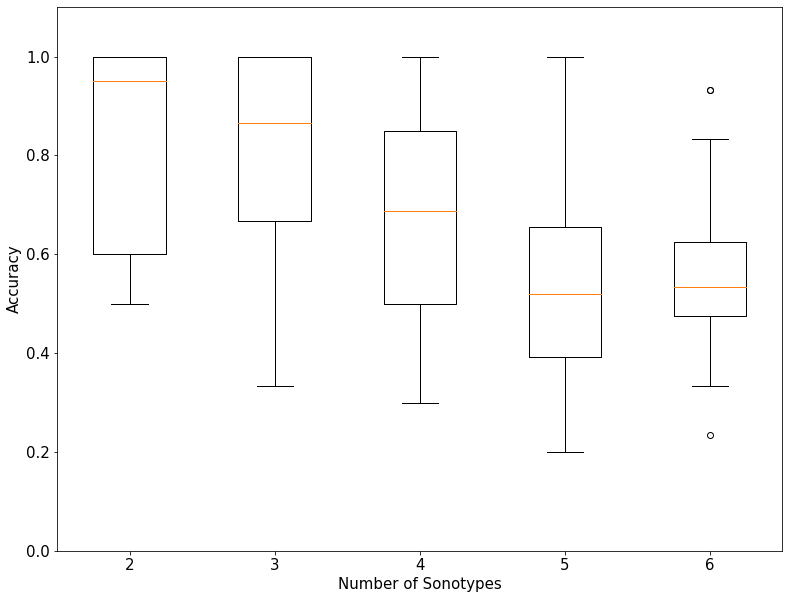

In [ ]:
plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 15})
# plt.title('Classification Accuracy On Birds with 49 Samples Per Classes With Augmentation')
plt.xlabel('Number of Sonotypes')
plt.ylabel('Accuracy')

labels,data = [],[]
for i in range(2,7):
  labels.append(i)
  data.append(aug_accuracy[i])
# labels, data = [*zip(*aug_accuracy.items())] 
print(labels,data) 
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim([0,1.1])

# plt.show()

plt.savefig("/non_augmentation_acc.png",bbox_inches='tight')
files.download("/non_augmentation_acc.png")  

# Random 6, not fix size

In [ ]:
filePath = "filepath"

sizes = []
accs = []
sonotypes = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      sonotypes.append([ int(x.split(".")[0]) for x in splited[0].split("; ")])
      sizes.append([ int(x) for x in splited[1].split("; ")])
      accs.append(float(splited[3]))

In [ ]:
s_unique, s_freq = np.unique(sonotypes,return_counts=True)

dic = {s_unique[i]: s_freq[i] for i in range(len(s_unique))} 
print(dic)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

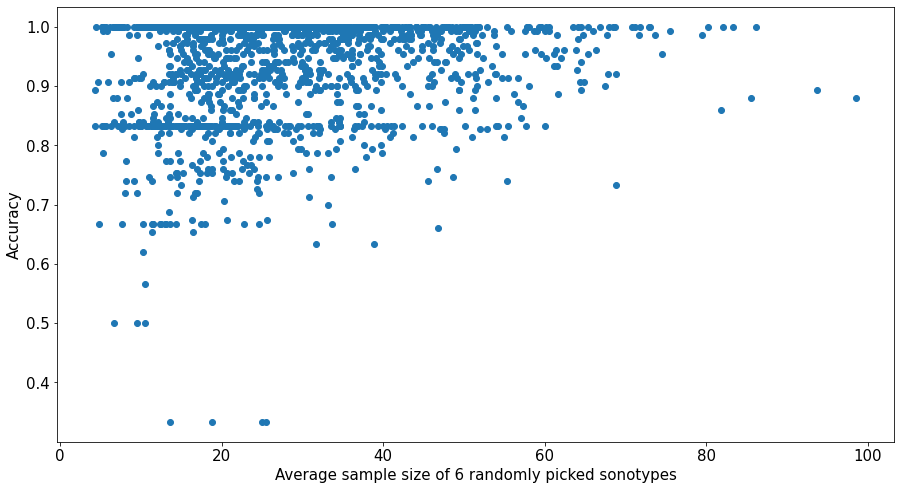

In [ ]:
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})

# plt.scatter(np.max(sizes, axis=1), accs, )
# plt.xlabel("Maximum sample size of 6 randomly picked sonotypes")
# plt.scatter(np.min(sizes, axis=1), accs, )
# plt.xlabel("Minimum sample size of 6 randomly picked sonotypes")
# plt.scatter(np.std(sizes, axis=1), accs, )
# plt.xlabel("Standard Deviation of sample sizes of  6 randomly picked sonotypes")
plt.scatter(np.mean(sizes, axis=1), accs, )
plt.xlabel("Average sample size of 6 randomly picked sonotypes")

plt.ylabel("Accuracy")
# plt.show()
plt.savefig("/random_6_avg.png",bbox_inches='tight')
files.download("/random_6_avg.png")  

# Random 15, not fix size


In [ ]:
filePath = "filepath"

sizes = []
accs = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      sizes.append([ int(x) for x in splited[1].split("; ")])
      accs.append(float(splited[3]))

In [ ]:
s_unique, s_freq = np.unique(sonotypes,return_counts=True)

dic = {s_unique[i]: s_freq[i] for i in range(len(s_unique))} 
print(dic)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

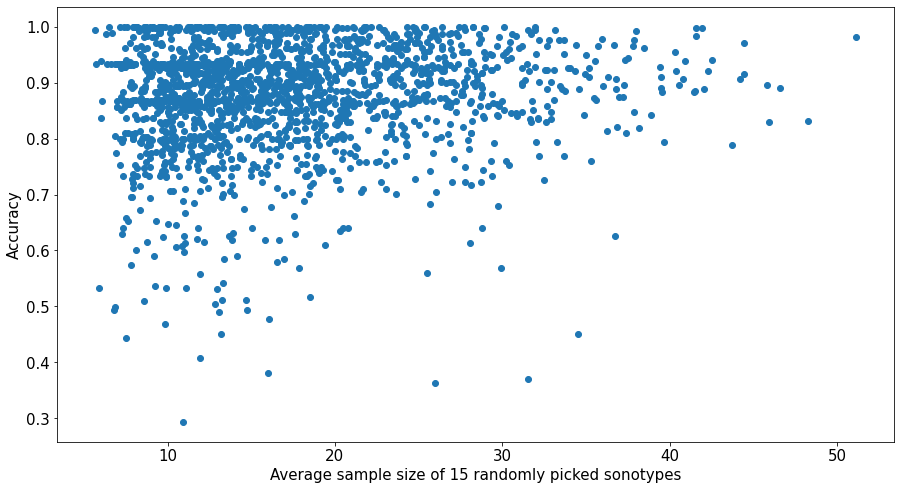

In [ ]:
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 15 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})

# plt.scatter(np.max(sizes, axis=1), accs, )
# plt.xlabel("Maximum of 15 randomly picked sonotypes")
# plt.scatter(np.min(sizes, axis=1), accs, )
# plt.xlabel("Minimum sample size of 15 randomly picked sonotypes")
# plt.scatter(np.std(sizes, axis=1), accs, )
# plt.xlabel("Standard Deviation of 15 randomly picked sonotypes")
plt.scatter(np.mean(sizes, axis=1), accs, )
plt.xlabel("Average sample size of 15 randomly picked sonotypes")

plt.ylabel("Accuracy")
# plt.show()

plt.savefig("/random_15_avg.png",bbox_inches='tight')
files.download("/random_15_avg.png")  

# Random 6, Fixed Size

In [ ]:
filePath = "filepath"

sizes = []
accs = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      sizes.append([ int(x) for x in splited[1].split("; ")])
      accs.append(float(splited[3]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

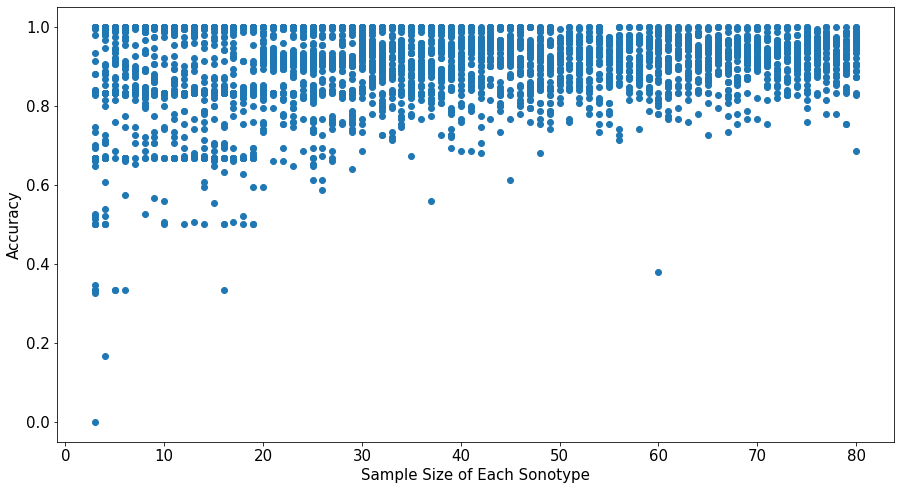

In [ ]:
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})

# plt.scatter(np.max(sizes, axis=1), accs, )
# plt.xlabel("Maximum of 15 randomly picked sonotypes")
# plt.scatter(np.min(sizes, axis=1), accs, )
# plt.xlabel("Minimum sample size of 15 randomly picked sonotypes")
# plt.scatter(np.std(sizes, axis=1), accs, )
# plt.xlabel("Standard Deviation of 15 randomly picked sonotypes")
plt.scatter(np.mean(sizes, axis=1), accs, )
plt.xlabel("Sample Size of Each Sonotype")

plt.ylabel("Accuracy")
# plt.show()

plt.savefig("/random_6_fixed_size_avg.png",bbox_inches='tight')
files.download("/random_6_fixed_size_avg.png")  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

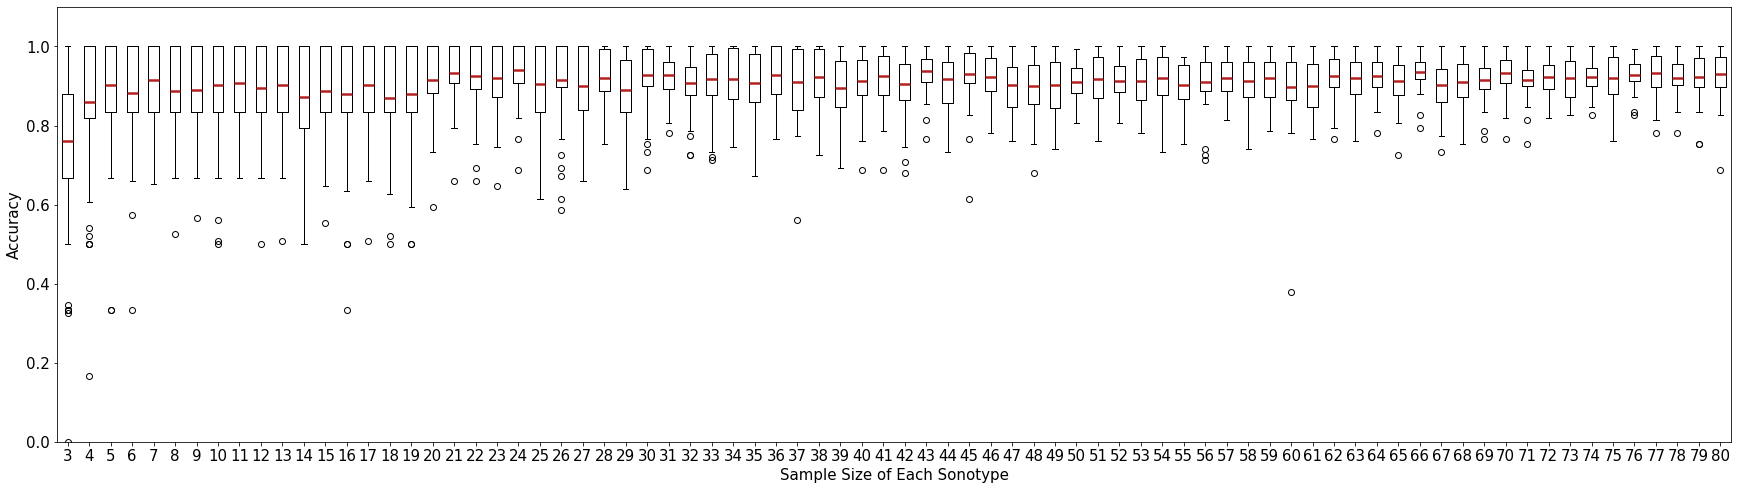

In [ ]:
# boxed plots for each sample size, not used in overleaf
plt.figure(figsize=(30,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})

labels = [x for x in range(3, int(max(np.mean(sizes, axis=1))) + 1 )]
data = [ [] for x in range(3,int(max(np.mean(sizes, axis=1))) + 1)]


for i in range(len(accs)):
  data[ int( np.mean(sizes[i]) ) -3 ].append(accs[i])

 
# print(data) 
plt.boxplot(data,meanline = True, showmeans=True, medianprops=dict(linewidth=0),
            meanprops= dict(linestyle='-.', linewidth=2.5, color='firebrick'))
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylim([0,1.1])

# plt.scatter(np.mean(sizes, axis=1), accs, )
plt.xlabel("Sample Size of Each Sonotype")

plt.ylabel("Accuracy")
# plt.show()

plt.savefig("/random_6_fixed_size_box.png",bbox_inches='tight')
files.download("/random_6_fixed_size_box.png")  


In [ ]:
# for no augmentation, still similar code as above, change filepath
filePath = "filepath"

sizes = []
accs = []

with open(filePath) as f:
  contents = f.read()
  lines = contents.split("\n")
  for line in lines:
    if line:
      splited = line.split(", ")
      sizes.append([ int(x) for x in splited[1].split("; ")])
      accs.append(float(splited[3]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

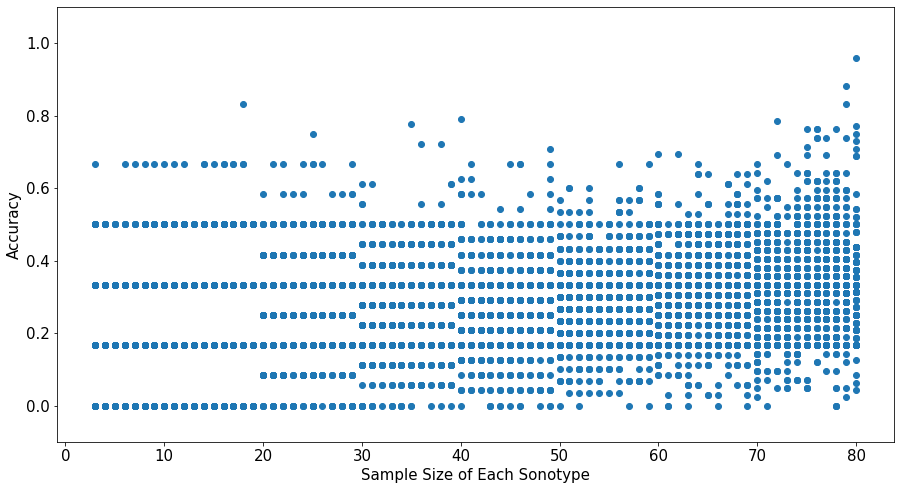

In [ ]:
plt.figure(figsize=(15,8))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})

# plt.scatter(np.max(sizes, axis=1), accs, )
# plt.xlabel("Maximum of 15 randomly picked sonotypes")
# plt.scatter(np.min(sizes, axis=1), accs, )
# plt.xlabel("Minimum sample size of 15 randomly picked sonotypes")
# plt.scatter(np.std(sizes, axis=1), accs, )
# plt.xlabel("Standard Deviation of 15 randomly picked sonotypes")
plt.scatter(np.mean(sizes, axis=1), accs, )
plt.xlabel("Sample Size of Each Sonotype")
plt.ylim([-0.1,1.1])

plt.ylabel("Accuracy")
# plt.show()

plt.savefig("/random_6_fixed_size_no_aug.png",bbox_inches='tight')
files.download("/random_6_fixed_size_no_aug.png")  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

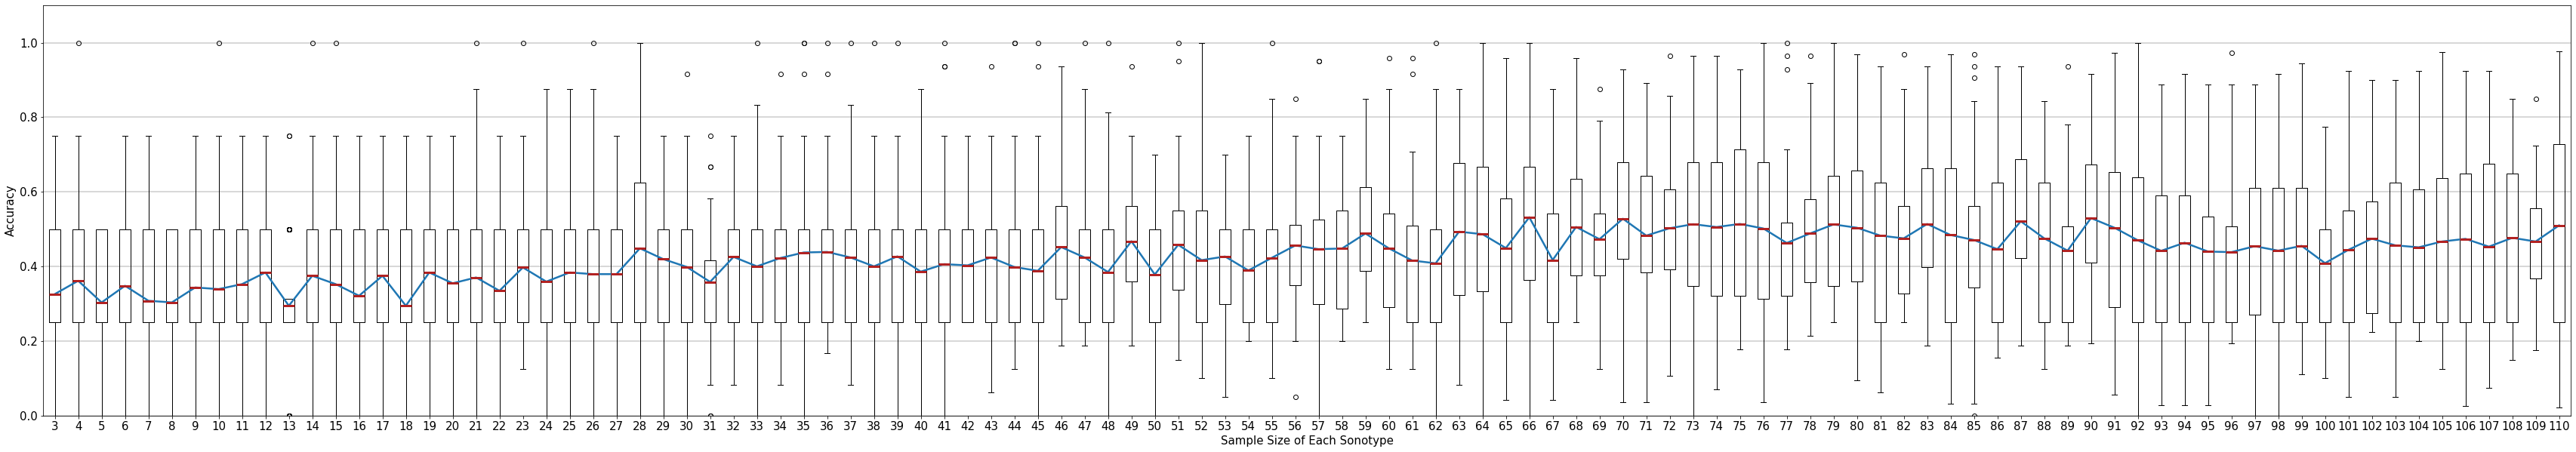

In [ ]:
plt.figure(figsize=(60,10))
# plt.title('Classification Accuracy On Randomly Picked 6 Sonotypes After Augmented to 250 Samples Per Sonotype')

plt.rcParams.update({'font.size': 15})

labels = [x for x in range(3, int(max(np.mean(sizes, axis=1))) + 1 )]
data = [ [] for x in range(3,int(max(np.mean(sizes, axis=1))) + 1)]

for i in range(len(accs)):
  data[ int( np.mean(sizes[i]) ) -3 ].append(accs[i])


plt.grid(color='grey', linestyle='-', linewidth=2, axis = "y", alpha =0.3)

# plt.boxplot(data)
plt.boxplot(data,meanline = True, showmeans=True, medianprops=dict(linewidth=0),
            meanprops= dict(linestyle='-.', linewidth=3, color='firebrick'))
plt.xticks(range(1, len(labels) + 1), labels)

plt.ylim([0,1.1])

plt.plot(range(1, len(labels) + 1), [ np.mean(data[x]) for x in range(len(data)) ], linewidth=2.5)
plt.xlabel("Sample Size of Each Sonotype")

plt.ylabel("Accuracy")
# plt.show()

plt.savefig("/random_4_fixed_size_no_aug_box.png",bbox_inches='tight')
files.download("/random_4_fixed_size_no_aug_box.png")  
